<h1><font color="#d3d3d3" size=15>¿Qué es Qiskit?</font></h1>

 - Qiskit es un kit de desarrollo software **(SDK)**, **open source** y creado por **IBM**, para trabajar con ordenadores cuánticos a nivel de **circuitos**, **pulsos** y **algoritmos**.
 - Qiskit permite desarrollar software cuántico tanto a nivel de código máquina **(OpenQASM)** como a niveles más altos sin necesitar experiencia en computación cuántica.

<h1><font color="#d3d3d3" size=5>Componentes</font></h1>



```
# Tiene formato de código
```


<figure>
  <img src="https://drive.google.com/uc?id=1WGYJANboIl4DIkvHKod54V37M96bE1NU" alt="Qiskit elements" width=700>
  <center><figcaption>Fuente: <a href="https://qiskit.org">https://qiskit.org</a></figcaption></center>
</figure>

Los 4 componentes de Qiskit principales son:
   - **Terra**: Este componente es el componente principal del que todos los demás dependen. Proporciona herramientas para:
     - Crear programas cuánticos al nivel de circuitos o pulsos
     - Optimizar programas cuánticos dependiendo del dispositivo en el que se vaya a ejecutar.
     - Gestionar las ejecuciones en dispositivos remotos.
     - Visualizar los programas cuánticos y los resultados de ejecutar dichos programas cuánticos
   - **Aer**: Este componente proporciona la parte de la simulación de Qiskit, con un alto rendimiento y con modelo de ruido realistas. Aer proporciona 3 simuladores de alto rendimiento:
     - **QasmSimulator**: Permite la ejecución de circuitos y devuelve el resultado de las medidas realizadas.
     - **StatevectorSimulator**: Permite la ejecución de circuitos una sola vez y devuelve el vector final tras la ejecución.
     - **UnitarySimulator**: Permite la ejecución una sola vez y devuelve la matriz final tras la ejecución.
   - **Aqua**: Este componente proporcionaba un conjunto de algoritmos para construir aplicaciones de diferentes dominios. Ya se le ha dejado de dar soporte y ahora se ha dividido en los componentes **Qiskit Optimization**, **Qiskit Finance**, **Qiskit Machine Learning** y **Qiskit Nature**.
   - **Ignis**: Actualmente está obsoleto y algunas de sus funcionalidades se han migrado a **Qiskit Terra** y **Qiskit Experiments**. Este componente estaba dedicado a:
     - Verficación de hardware cuántico.
     - Corrección de errores.
     - Caracterización del riudo.


En esta asignatura vamos a utilizar **Terra** y **Aer**.

In [ ]:
#!pip install qiskit qiskit-aer

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install pylatexenc

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.
error: externally-managed-environment

× This environment is externally managed
╰

<h1><font color="#d3d3d3" size=5>Ejemplo de un circuito cuántico</font></h1>

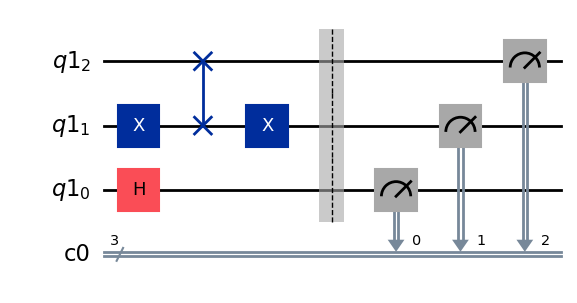

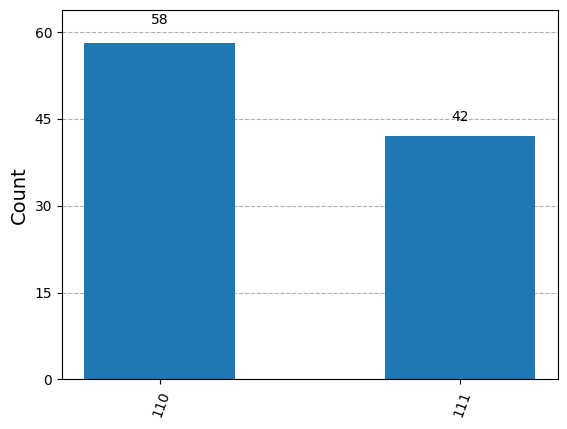

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#d3d3d3" size=5>Pasos para la creación y ejecución de un circuito</font></h1>

Los pasos son los siguientes:
   1. Importar los módulos necesarios para nuestro circuito.
   2. Crear los **registros de qubits** necesarios para el circuito.
   3. Crear los **registros de bits** necesarios para el circuito.
   4. Crear el circuito, incluyendo los registros creados anteriormente, con **QuantumCircuit()**.
   5. Añadimos las puertas y operadores necesarios al circuito.
   6. Añadimos las medidas a los qubits del registro de qubits que queramos medir y lo volcamos en los bits de los registros de bits que deseemos.
   7. Mostramos el circuito **(Opcional)**.
   8. Ejecutamos el circuito en un computador real o en un simulador de los disponibles.
   9. Mostramos los resultados.

<h1><font color="#d3d3d3" size=5>Registros cuánticos</font></h1>

Para crear un registro cuántico se utiliza la función **QuantumRegister(size, name)**:
   - **size**: Número entero que indica el tamaño del registro.
   - **name**: String que indica el nombre del registro. El nombre debe cumplir las restricciones de los nombres de variables de **OpenQASM**. **(Opcional)**

In [3]:
from qiskit import QuantumRegister

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3, name="registro_cuantico_1")

<h1><font color="#d3d3d3" size=5>Registros clásicos</font></h1>

Para crear un registro clásico se utiliza la función **ClassicalRegister(size, name)**:
   - **size**: Número entero que indica el tamaño del registro.
   - **name**: String que indica el nombre del registro. El nombre debe cumplir las restricciones de los nombres de variables de **OpenQASM**. **(Opcional)**

In [4]:
from qiskit import ClassicalRegister

#Creamos el registro clásico de bits
creg = ClassicalRegister(3, name="registro_clasico_1")

<h1><font color="#d3d3d3" size=5>Circuitos cuánticos</font></h1>

Para crear un registro clásico se utiliza la función **QuantumCircuit(*regs, name)**:
   - ***regs**: Lista de registros que se van a incluir en el circuito.
   - **name**: String que indica el nombre del circuito. **(Opcional)**

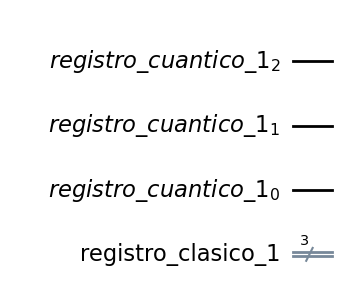

In [5]:
from qiskit import QuantumCircuit

#Creamos el circuito y añadimos los registros
circ = QuantumCircuit(qreg, creg, name="Circuito de ejemplo")
display(circ.draw(output='mpl', reverse_bits=True))

<h1><font color="#d3d3d3" size=5>Puertas disponibles</font></h1>

La lista de puertas cuánticas disponibles en qiskit son:
   - Puertas de 1 qubit:
     - **.x(qubit)**: Aplica la puerta **X** al qubit _qubit_.
     - **.y(qubit)**: Aplica la puerta **Y** al qubit _qubit_.
     - **.z(qubit)**: Aplica la puerta **Z** al qubit _qubit_.
     - **.h(qubit)**: Aplica la puerta **Hadamard** al qubit _qubit_.
     - **.rx($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **X**  al qubit _qubit_.
     - **.ry($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **Y**  al qubit _qubit_.
     - **.rz($\phi$, qubit)**: Realiza una rotación de $\phi$ en el eje **Z**  al qubit _qubit_.
     - **.i(qubit)**: Aplica la puerta **I** al qubit _qubit_.
     - **.s(qubit)**: Aplica la puerta **$\sqrt{Z}$** al qubit _qubit_.
     - **.sdg(qubit)**: Aplica la puerta **$\sqrt{Z}^{\dagger}$** al qubit _qubit_.
     - **.t(qubit)**: Aplica la puerta **$\sqrt[\leftroot{-2}\uproot{3}4]{Z}$** al qubit _qubit_.
     - **.tdg(qubit)**: Aplica la puerta **$\sqrt[\leftroot{-2}\uproot{3}4]{Z}^{\dagger}$** al qubit _qubit_.
     - **.u($\theta$, $\phi$, $\lambda$, qubit)**: Aplica la matriz:
   
   \begin{equation}
\begin{pmatrix}
\cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}}\\
e^{i\phi}\sin{\frac{\theta}{2}} & e^{i\left(\phi+\lambda\right)}\cos{\frac{\theta}{2}}
\end{pmatrix}
\end{equation}


   - Puertas de 2 qubits
     - **.cx(control_qubit, target_qubit)**: Aplica una puerta **X** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cy(control_qubit, target_qubit)**: Aplica una puerta **Y** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cz(control_qubit, target_qubit)**: Aplica una puerta **Z** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.ch(control_qubit, target_qubit)**: Aplica una puerta **Hadamard** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.crz($\phi$, control_qubit, target_qubit)**: Aplica una puerta **$R_{z}\left(\phi\right)$** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.cu3($\theta$, $\phi$, $\lambda$, control_qubit, target_qubit)**: Aplica una puerta **$U\left(\theta, \phi, \lambda\right)$** al qubit _target_qubit_ y controlada por el qubit _control_qubit_.
     - **.swap(qubit1, qubit2)**: Intercambia los qubits _qubit1_ y _qubit2_.
   - Puertas de 3 qubits:
     - **.ccx(control_qubit1, control_qubit2, target_qubit)**: También llamada **Toffoli**, es la puerta **X** controlada por 2 qubits.
     - **.cswap(control_qubit, qubit1, qubit2)**: Realiza un intercambio controlado por el qubit _control_qubit_ entre los qubits _qubit1_ y _qubit2_.
   - Operaciones no unitarias:
     - **.measure(qubit, cbit)**: Mide el qubit o lista de qubits _qubit_ y vuelca el resultado en el bit o lista de bits _cbit_.
   - Operaciones condicionales:
     - Para aplicar una puerta de manera condicional se realiza de la siguiente forma:
       - **.gate(args).c_if(creg, value)**: Aplica la puerta _gate_ si el valor del registro _creg_ es igual al valor _value_.
      

<h1><font color="#d3d3d3" size=5>Ejemplo de un circuito simple</font></h1>

In [6]:
from qiskit import QuantumCircuit

#Creamos el circuito y añadimos los registros
circ = QuantumCircuit(qreg, creg, name="Circuito de ejemplo")
circ.ch(qreg[1], qreg[0])
circ.x(qreg[2])
circ.z(qreg[0])
circ.cswap(qreg[2], qreg[1], qreg[0])
circ.measure(qreg[1], creg[0])
circ.ry(2.44, qreg[2]).c_if(creg, 5)

<h1><font color="#d3d3d3" size=5>Dibujar el circuito</font></h1>

Para visualizar el circuito se usa el método de la clase **QuantumCircuit** _.draw()_. Para visualizar arriba los qubits más significativos y abajo los qubits menos significativos le añadimos el argumento **reverse_bits=True**.

In [7]:
display(circ.draw(reverse_bits=True))

┌───┐           ┌──────────┐
registro_cuantico_1_2: ┤ X ├──────■────┤ Ry(2.44) ├
                       └───┘      │ ┌─┐└────╥─────┘
registro_cuantico_1_1: ──■────────X─┤M├─────╫──────
                       ┌─┴─┐┌───┐ │ └╥┘     ║      
registro_cuantico_1_0: ┤ H ├┤ Z ├─X──╫──────╫──────
                       └───┘└───┘    ║   ┌──╨──┐   
 registro_clasico_1: 3/══════════════╩═══╡ 0x5 ╞═══
                                     0   └─────┘

Para visualizarlo de manera más agradable podemos usar **Matplotlib**, para ello se lo indicamos con el argumento **output='mpl'**.

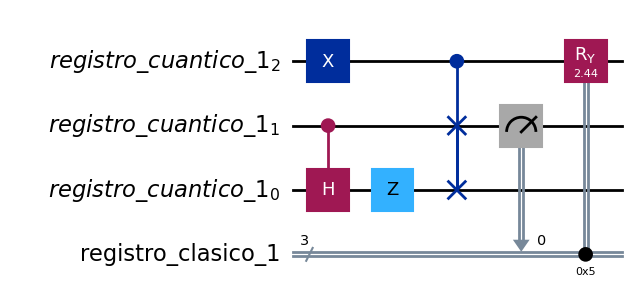

In [8]:
display(circ.draw(output='mpl', reverse_bits=True))

<h1><font color="#d3d3d3" size=5>Mediciones</font></h1>

Para medir un qubit o un registro de qubits se utiliza el método:
 - **.measure(qubit, cbit)**: Mide el qubit o lista de qubits _qubit_ y vuelca el resultado en el bit o lista de bits _cbit_.

Para llevarlas a cabo tenemos que ejecutar el circuito en el simulador **qasm_simulator**, incluido en el componente **Aer**, e indicar el número de ejecuciones que se desean. Esto se consigue siguendo los siguientes pasos:

 1. Obtención del **Backend** con la sentencia: __backend = Aer.get_backend('qasm_simulator')__
 2. Transpilación del circuito (descomposicion del circuito en puertas disponibles en el **Backend**): __transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)__
 3. Ejecutar el circuito transpilado en el **Backend**: __job = backend.run(transpiled_circuit, shots=100)__
 4. Obtener los resultados: __job.result().get_counts()__

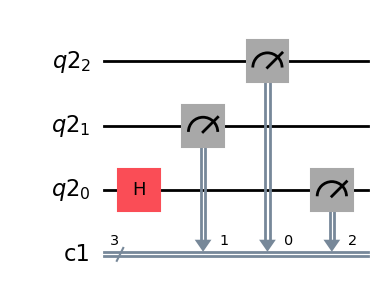

{'100': 50, '000': 50}


In [9]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')

circ.h(qreg[0])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[-1:-4:-1])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)

<h1><font color="#d3d3d3" size=5>Visualización de los resultados</font></h1>

Para la visualización de las mediciones podemos usar la función **plot_histogram(counts)** del módulo **qiskit.visualization**, donde **counts** es el diccionario resultante de las mediciones.

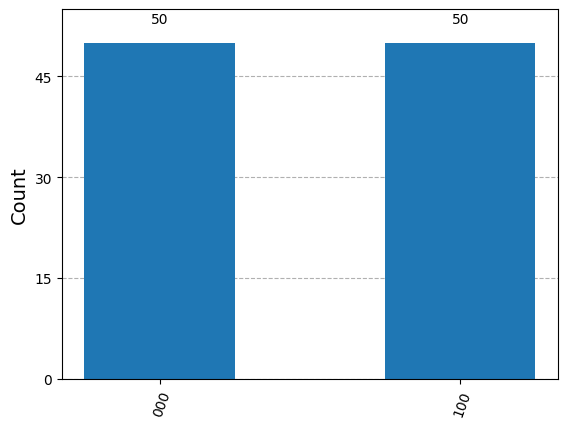

In [10]:
#Mostramos los resultados
plot_histogram(counts)

<h1><font color="#d3d3d3" size=5>Orden y representación de los registros y puertas</font></h1>

Por defecto **Qiskit** muestra el circuito con los qubits menos significativos arriba y los más significativos abajo. También al aplicar un operador de varios qubits los aplica por defecto de menos significativos a más significativos. Nosotros vamos a aplicar el orden inverso para que haya una coherencia de las fórmulas matemáticas con los dibujos de los circuitos:

<img src="https://drive.google.com/uc?id=1sjvSRta4SNr02Nz1_8Wx4no1o7i6Uhow" alt="Order explanation" width="700" />

<h1><font color="#d3d3d3" size=5>OpenQASM en Qiskit</font></h1>

Podemos crear circuitos cuánticos a partir de código o ficheros **OpenQASM**. También podemos exportar el circuito creado a código **OpenQASM**. Para ello se utilizan los siguientes métodos:
 - **QuantumCircuit.from_qasm_str(qasm_str)**: Esta función crea un circuito cuántico a partir de una cadena de caracteres de código **OpenQASM**, donde **qasm_str** es dicha cadena.
 - **qasm2.load(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** de **versión 2** que se encuentra en la ruta **path**.
 - **qasm3.load(path)**: Esta función importa un circuito cuántico a partir de un fichero **OpenQASM** de **versión 3** que se encuentra en la ruta **path**.
 - **qasm2.dumps(circuit)**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM 2**.
 - **qasm3.dumps(circuit)**: Devuelve una cadena de caracteres con el circuito cuántico en **OpenQASM 3**.

### Creación de un circuito a partir de una cadena de caracteres

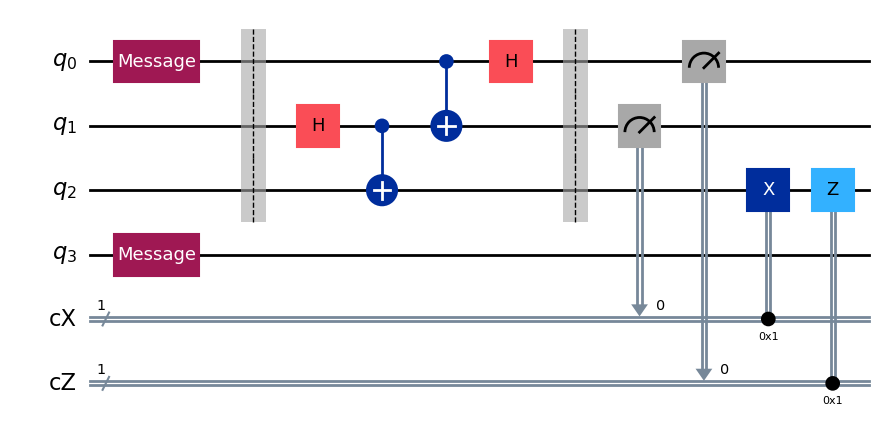

In [11]:
from qiskit import QuantumCircuit, qasm2, qasm3
import os

qasm_code = '''
        OPENQASM 2.0;
        include "qelib1.inc";
        gate message a {
          u3(pi/8, pi/3, 2.22) a;
        }

        qreg q[4];
        creg cX[1];
        creg cZ[1];

        message q[0];
        barrier q[0],q[1],q[2];
        h q[1];
        cx q[1],q[2];
        cx q[0],q[1];
        h q[0];
        barrier q[0],q[1],q[2];

        measure q[1] -> cX[0];
        measure q[0] -> cZ[0];
        if (cX==1) x q[2];
        if (cZ==1) z q[2];

        message q[3];'''

#Creamos el circuito
circ = QuantumCircuit.from_qasm_str(qasm_code)
display(circ.draw(output='mpl'))

### Exportar un circuito a OpenQASM

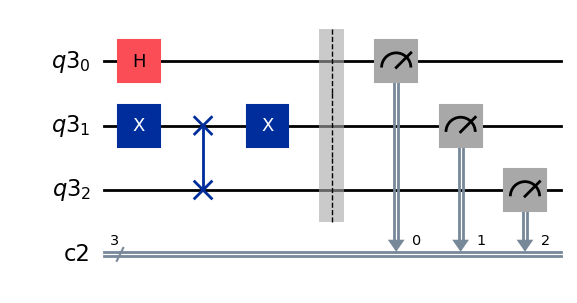

QASM2 Circ
OPENQASM 2.0;
include "qelib1.inc";
qreg q3[3];
creg c2[3];
x q3[1];
swap q3[1],q3[2];
h q3[0];
x q3[1];
barrier q3[0],q3[1],q3[2];
measure q3[0] -> c2[0];
measure q3[1] -> c2[1];
measure q3[2] -> c2[2];
--------------------------------------------------------------------------------
QASM3 Circ
OPENQASM 3.0;
include "stdgates.inc";
bit[3] c2;
qubit[3] q3;
x q3[1];
swap q3[1], q3[2];
h q3[0];
x q3[1];
barrier q3[0], q3[1], q3[2];
c2[0] = measure q3[0];
c2[1] = measure q3[1];
c2[2] = measure q3[2];



In [12]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(3)

#Creamos el registro clásico de bits
creg = ClassicalRegister(3)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito cuántico')
circ.x(qreg[1])
circ.swap(qreg[1], qreg[2])
circ.h(qreg[0])
circ.x(qreg[1])
circ.barrier()

#Añadimos las medidas
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl'))

#Exportamos el circuito
qasm2_circ = qasm2.dumps(circ)
qasm3_circ = qasm3.dumps(circ)
print("QASM2 Circ")
print(qasm2_circ)
print("-"*80)
print("QASM3 Circ")
print(qasm3_circ)

## Ejercicio

Probar el circuito en <a href="https://quantum-computing.ibm.com/composer/files/new">IBM Composer</a>

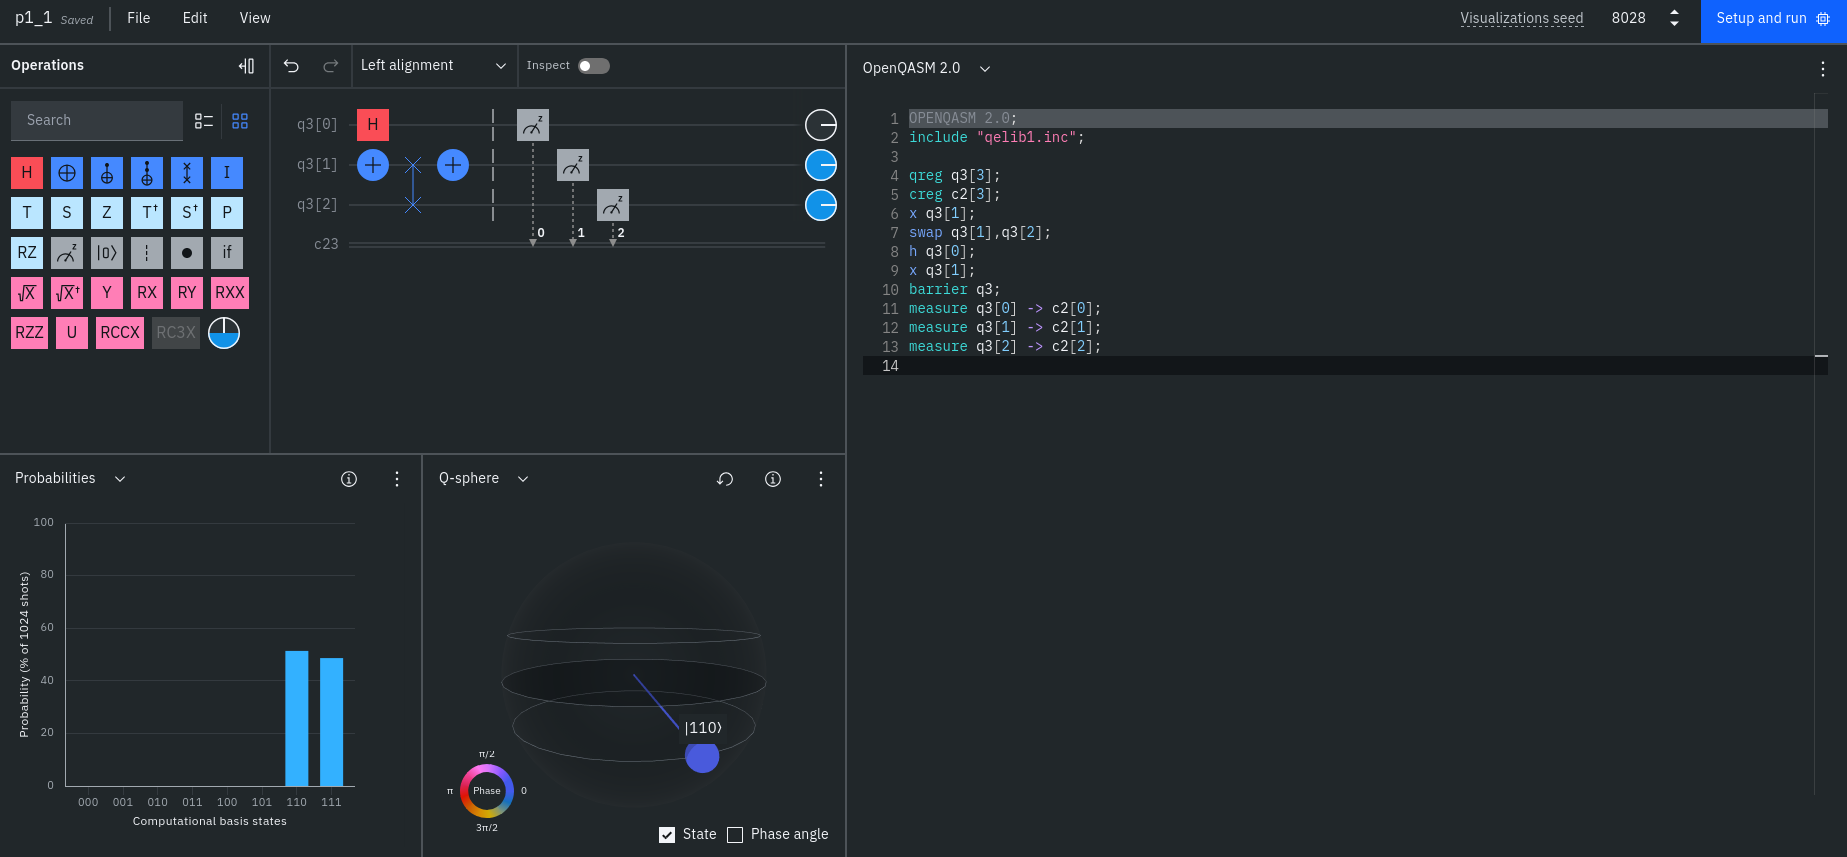

<h1><font color="#d3d3d3" size=2>Ejercicio</font></h1>

Importar el circuito de Grover hecho en formato OpenQASM y visualizarlo. El circuito se encuentra aquí:
https://drive.google.com/uc?export=download&id=1T5xe-Oq1IUE-F8auIjKfFWEw18qToue3

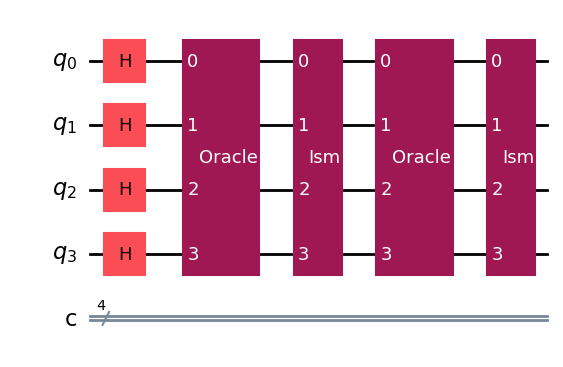

In [13]:
from qiskit import QuantumCircuit

#qasm2_path = os.path.join("files", "grover_sol.qasm")
#circ = qasm2.load(qasm2_path)
#Mostramos el circuito
#display(circ.draw(output='mpl'))

import requests
from qiskit import qasm2

url = "https://drive.google.com/uc?export=download&id=1T5xe-Oq1IUE-F8auIjKfFWEw18qToue3"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes

qasm_str = response.text
circ = qasm2.loads(qasm_str)  # Use loads() to load from a string

#Mostramos el circuito
display(circ.draw(output='mpl'))

Para visualizar las puertas que hay dentro de los operadores podemos usar la función **.decompose()** que tiene la clase **QuantumCircuit**.

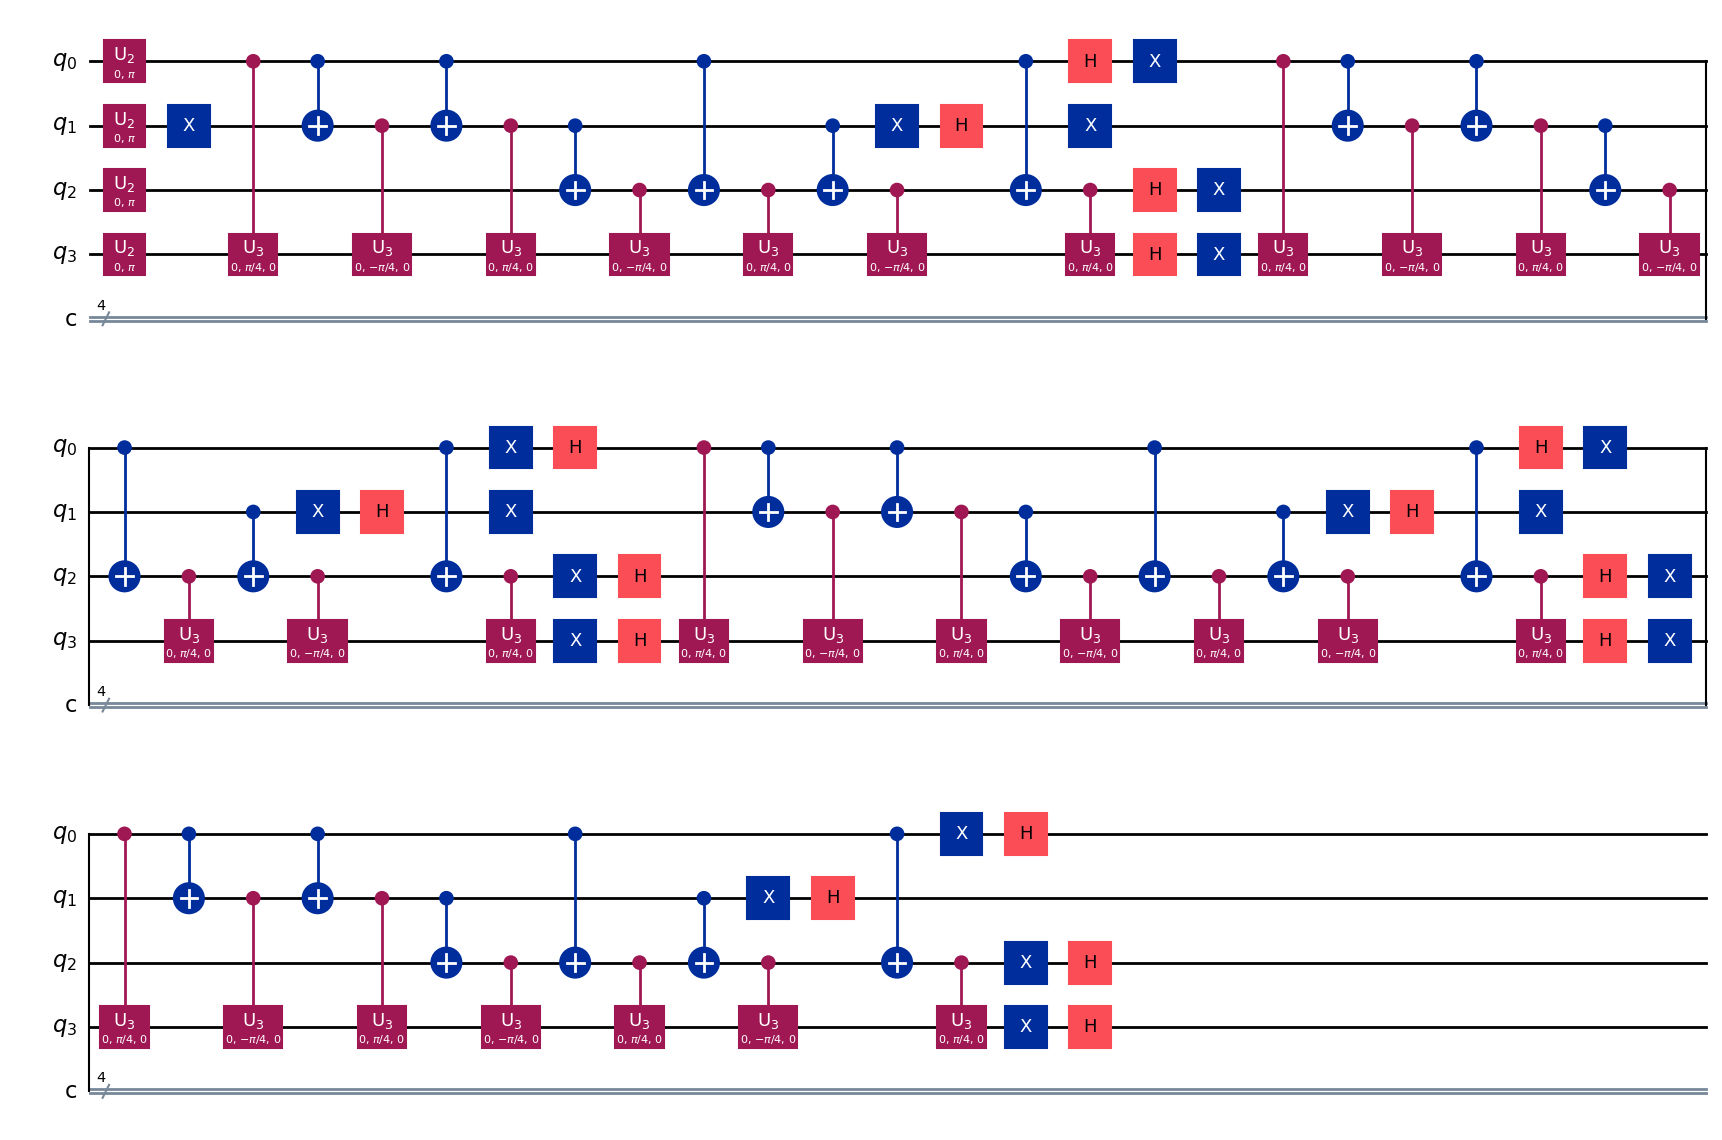

In [14]:
display(circ.decompose().draw(output='mpl'))

# Primeros pasos

## Ejercicio

Crea un par EPR, mide los 2 qubits y muestra los resultados con un diagrama de barras.

El codigo de abajo crea el estado de Bell:
$$\vert \Phi^+ \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle)$$

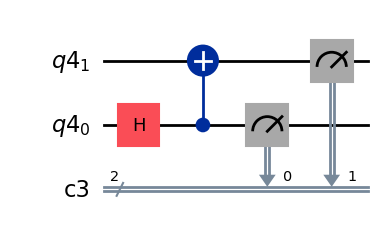

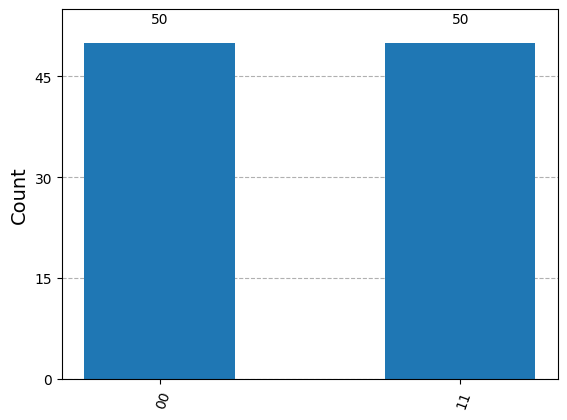

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#Creamos el registro cuántico de 2 qubits
qreg = QuantumRegister(2);

#Creamos el registro clásico de bits
creg = ClassicalRegister(2);

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito Estado Bell 1')
#Aplicamos hadamard al primer qubit
circ.h(qreg[0])
#Aplicamos CNOT al segundo qubit controlado por el primero
circ.cx(qreg[0], qreg[1])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)

Si ahora quisieramos generar el segundo estado de Bell solo necesitariamos negar la fase con una puerta de Pauli X antes de meterle la Hadamard al primer qubit.

El codigo de abajo crea el estado de Bell:
$$\vert \Phi^- \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle - \vert 11 \rangle)$$

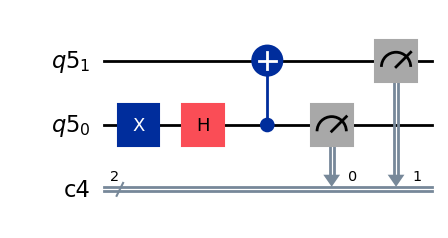

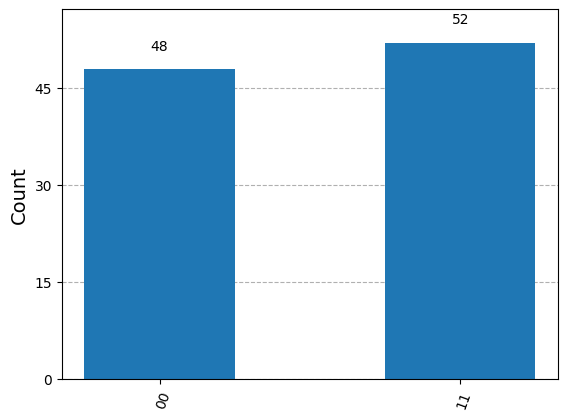

In [16]:
#Creamos el registro cuántico de 2 qubits
qreg = QuantumRegister(2);

#Creamos el registro clásico de bits
creg = ClassicalRegister(2);

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito Estado Bell 2')
#Aplicamos Pauli X al primer qubit
circ.x(qreg[0])
#Aplicamos hadamard al primer qubit
circ.h(qreg[0])
#Aplicamos CNOT al segundo qubit controlado por el primero
circ.cx(qreg[0], qreg[1])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)

Para el tercer estado de bell usamos lo mismo que para el primer estado pero negando con una Pauli X el segundo qubit para que comience en el estado 1.

El codigo de abajo crea el estado de Bell:
$$\vert \Psi^+ \rangle = \frac{1}{\sqrt{2}}(\vert 01 \rangle + \vert 10 \rangle)$$

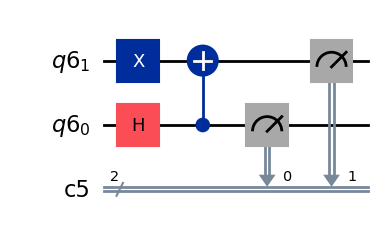

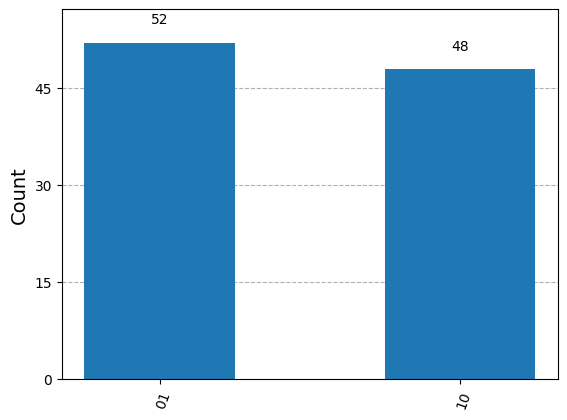

In [17]:
#Creamos el registro cuántico de 2 qubits
qreg = QuantumRegister(2);

#Creamos el registro clásico de bits
creg = ClassicalRegister(2);

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito Estado Bell 3')
#Aplicamos Pauli X al segundo qubit
circ.x(qreg[1])
#Aplicamos hadamard al primer qubit
circ.h(qreg[0])
#Aplicamos CNOT al segundo qubit controlado por el primero
circ.cx(qreg[0], qreg[1])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)

Y por ultimo si queremos generar el 4 estado de Bell aplicamos Pauli X al segundo qubit, una Hadamard al primero, una CNOT con el control siendo el primero qubit y despues aplicar una puerta de Pauli Z a ambos qubits para negar sus fases.

El codigo de abajo crea el estado de Bell:
$$\vert \Psi^- \rangle = \frac{1}{\sqrt{2}}(\vert 01 \rangle - \vert 10 \rangle)$$


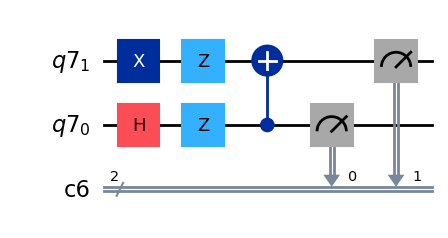

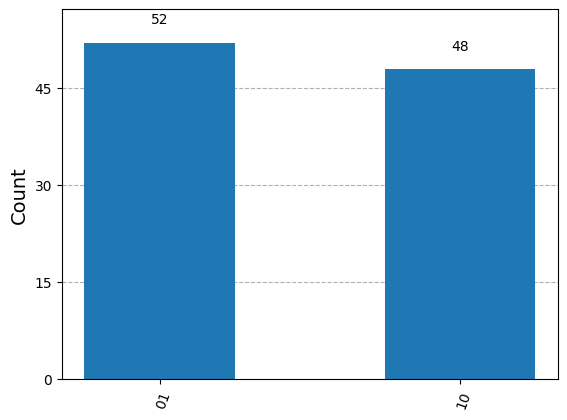

In [18]:

#Creamos el registro cuántico de 2 qubits
qreg = QuantumRegister(2);

#Creamos el registro clásico de bits
creg = ClassicalRegister(2);

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Circuito Estado Bell 4')
#Aplicamos Pauli X al segundo qubit
circ.x(qreg[1])
#Aplicamos hadamard al primer qubit
circ.h(qreg[0])
#Aplicamos Pauli Z a ambas puertas para negar su fase
circ.z(qreg)
#Aplicamos CNOT al segundo qubit controlado por el primero
circ.cx(qreg[0], qreg[1])

#Añadimos las medidas y las volcamos en orden inverso
circ.measure(qreg[:], creg[:])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)

## Creación de puertas y operadores

Vamos a usar 2 formas de contruir puertas y operadores:
  - A partir de una matriz: Para ello construimos la matriz unitaria con **Numpy** y se la pasamos como parametro al constructor **UnitaryGate** que se encuentra en el módulo **qiskit.circuit.library**. Una vez la tenemos creada la podemos añadir a un circuito con el método **.append(gate, qubits)** donde _gate_ es la puerta creada y _qubits_ es una lista con los qubits a los que se quiere aplicar (tiene que ser del mismo tamaño que el tamaño de la puerta).
  - Por composición de circuitos: Esta forma de crear operadores es crear circuitos e ir añadiendolos al circuito principal mediente el método **.append(circuit, qubits)** donde _circuit_ es el circuito del operador que hemos creado y _qubits_

### A partir de una matriz

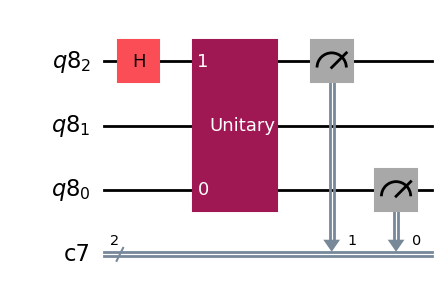

{'00': 57, '11': 43}


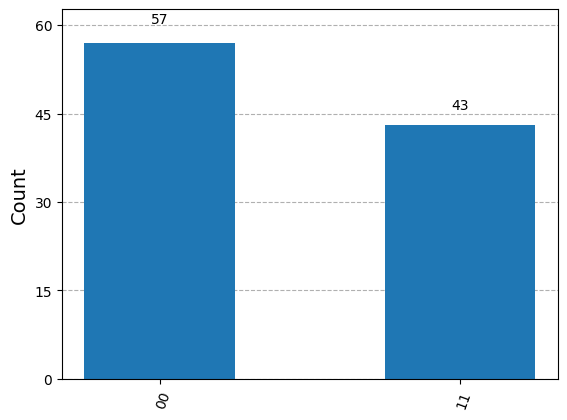

In [19]:
from qiskit.circuit.library import UnitaryGate
#import numpy as np
#%run files/aux_func.py

#######equivalente aux_func.py
import numpy as np

X = np.array([[0, 1],
            [1, 0]])

Y = np.array([[0, 1j],
            [1j, 0]])

Z = np.array([[1, 0],
            [0, -1]])

H = (1/np.sqrt(2)) * np.array([[1, 1],
                            [1, -1]])

def controlled_e_u(u, e):
    length = u.shape[0]
    ket_0 = np.array([[1], [0]])
    ket_1 = np.array([[0], [1]])
    if e == 1:
        return np.add(np.kron(np.outer(ket_0, ket_0), np.eye(length)), np.kron(np.outer(ket_1, ket_1), u))
    else:
        return np.add(np.kron(np.outer(ket_0, ket_0), u), np.kron(np.outer(ket_1, ket_1), np.eye(length)))

#####
###equivalente aux_func.py

cnot_matrix = controlled_e_u(X, 1)


cnot_gate = UnitaryGate(cnot_matrix)

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg, creg)


#ism_ctrl = ism_3_gate.control(1, 'Controlled ISM', 1)
circ.h(2)
circ.append(cnot_gate, [0, 2])

circ.measure(qreg[2], creg[1])
circ.measure(qreg[0], creg[0])

display(circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)

display(plot_histogram(counts))

### Composición de circuitos

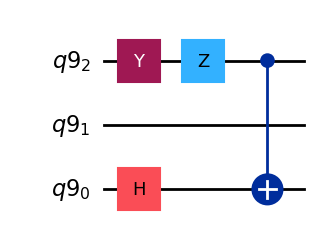

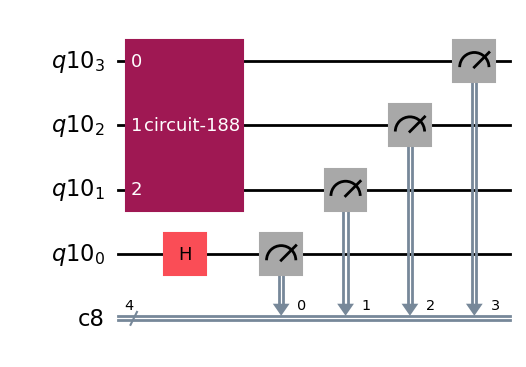

{'0010': 26, '1011': 26, '0011': 28, '1010': 20}


In [20]:
from qiskit.circuit.library import UnitaryGate
import numpy as np

#Creación del operador
qreg1 = QuantumRegister(3)
circuit_operator = QuantumCircuit(qreg1)

circuit_operator.y(2)
circuit_operator.z(2)
circuit_operator.h(0)
circuit_operator.cx(2, 0)
display(circuit_operator.draw(output='mpl', reverse_bits=True))


#Creación del circuito principal
qreg2 = QuantumRegister(4)
creg2 = ClassicalRegister(4)
circ = QuantumCircuit(qreg2, creg2)

circ.h(0)
circ.append(circuit_operator, [3, 2, 1])

circ.measure(qreg2, creg2)

display(circ.draw(output='mpl', reverse_bits=True))

#display(circ.decompose().draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

print(counts)

# Puertas multicontroladas

Las 2 principales puertas multicontroladas que vamos a usar son:
  - **.mcx(control_qubits, target_qubit)**: Esta puerta es una puerta **X** multicontrolada, donde _control_qubits_ es una lista con los qubits de control y _target_qubit_ es el qubit al que se le aplica la puerta.
  - **.mcmt(gate, num_ctrl_qubits, num_target_qubits)**: Aplica una puerta _gate_ a un número de qubits _num_target_qubits_ controlada por un número de qubits _num_ctrl_qubits_ tanto los qubits de control como los de objetivo son consecutivos y empiezan por el menos significativo.
  
También hay otra forma de crear puertas controladas, es con el método **.control(n_controls)** que tienen las puertas y circuitos donde el parámetro _n\_controls_ es el número de controles que va a tener.

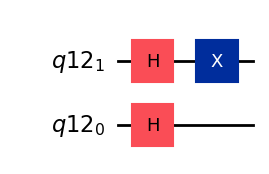

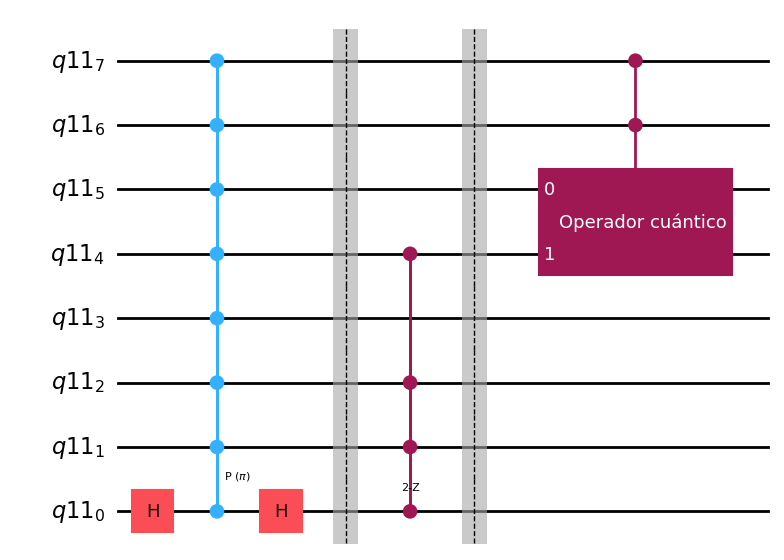

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(8)

#Creamos el circuito
circ = QuantumCircuit(qreg, name='Circuito cuántico')

#Añadimos las diferentes puertas multicontroladas
circ.mcx([7 - i for i in range(7)], 0)
circ.barrier()
circ.append(MCMT('z', num_ctrl_qubits=3, num_target_qubits=2), [i for i in range(5)])
circ.barrier()

qreg2 = QuantumRegister(2)
operator_circ = QuantumCircuit(qreg2, name='Operador cuántico')
operator_circ.h(qreg2)
operator_circ.x(1)
#Mostramos el circuito

circ.append(operator_circ.control(2), [8 - i - 1 for i in range(4)])

#Mostramos el circuito
display(operator_circ.draw(output='mpl', reverse_bits=True))
display(circ.decompose().draw(output='mpl', reverse_bits=True))

## Ejercicio

Crear la puerta $C^{5}X$ con cada una de las 3 formas explicadas, teniendo en cuenta que los qubits de control tienen que ser los más significativos.

En este primer bloque de código vamos a crear nuestra puerta $C^{5}X$ usando la primera manera que. Usando una puerta $X$ multicontrolada.

Para ello vamos a usar la funcion.mcx(ctrl_qubits, target_qubit).

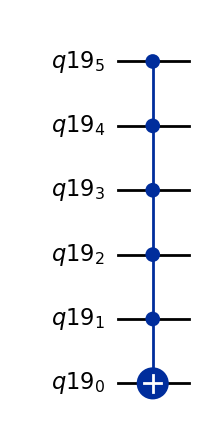

In [25]:
from qiskit import QuantumCircuit, QuantumRegister

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(6)

#Creamos el circuito
circ = QuantumCircuit(qreg, name='5 toffoli control gate using mcx')

#Añadimos la puerta x multicontrol
circ.mcx([5 - i for i in range(5)], 0)

# Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

En el siguiente bloque de codigo vamos a usar la funcion mcmt(gate, num_ctrl_qubits, num_target_qubits). Aqui la gate que vamos a usar va a ser la $X$ ya que queremos que sea un NOT 5 controlado 

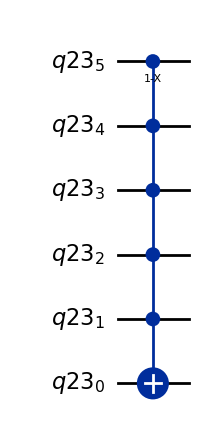

In [29]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import MCMT

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(6)

#Creamos el circuito
circ = QuantumCircuit(qreg, name='5 toffoli control gate using mcmt')

#Añadimos la puerta x multicontrol
circ.append(MCMT('x', num_ctrl_qubits=5, num_target_qubits=1), [6 - i - 1 for i in range(6)])

# Mostramos el circuito
display(circ.decompose().draw(output='mpl', reverse_bits=True))

La ultima forma que vamos a usar es usando la funcion .control(n_ctrls). Para ello vamos a tener que importar y usar la puerta $X$ y usar la funcion arriba mencionada para aplicarle los controles necesarios.

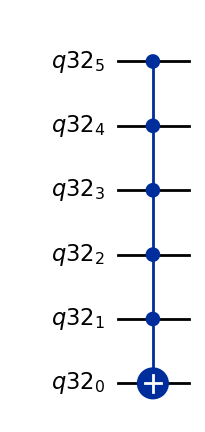

In [37]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(6)

#Creamos el circuito
circ = QuantumCircuit(qreg, name='5 toffoli control gate using x')

#Creamos la puerta x
x_gate = XGate()

#Añadimos la puerta x multicontrol
controlled_x_gate = x_gate.control(5)

#Apliamos la puerta x multicontrol
circ.append(controlled_x_gate, [6 - i - 1 for i in range(6)])

# Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))

## Ejecución en un computador cuántico real

Para ejecutar un circuito cuántico en un computador real de IBM vamos a seguir los siguientes pasos:
  1. Obtenemos el proveedor de IBM con **QiskitRuntimeService(channel="ibm_quantum", token=token)** donde _token_ es la credencial proporcionada por IBM.
  2. Obtenemos el computador cuántico donde queremos ejecuarlo con **.backend(backend_name)** o **.least_busy(simulator=False, operational=True)** donde _backend_name_ es el nombre del computador cuántico.
     -  Con **.backends()** podemos ver los backends disponibles.
  4. Creamos el circuito.
  5. Ejecutamos el circuito.
  6. Mostramos los resultados.

In [ ]:
!pip install qiskit_ibm_runtime

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Personal token for IBM Quantum platform
token = ""

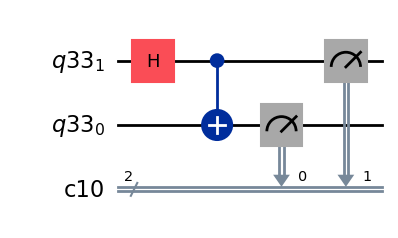

Backends disponibles: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


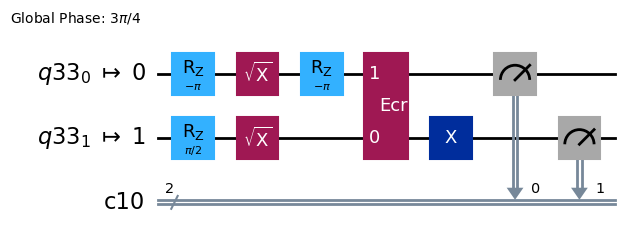

In [39]:
#Creamos el circuito
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circ = QuantumCircuit(qreg, creg)

circ.h(1)
circ.cx(1, 0)

circ.measure(qreg, creg)

display(circ.draw(output='mpl', reverse_bits=True))

# Ejecutamos en un backend real
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

print("Backends disponibles:", service.backends())

backend = service.least_busy(simulator=False, operational=True)
#backend = service.backend('ibm_brisbane')

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ)

isa_circuit.draw("mpl", idle_wires=False)

In [40]:
# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cz6rjk2kvm9g008gnck0
PrimitiveResult([SamplerPubResult(data=DataBin(c10=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-09 12:27:59', stop='2025-03-09 12:28:00', size=100>)])}, 'version': 2})


{'01': 5, '00': 45, '11': 46, '10': 4}


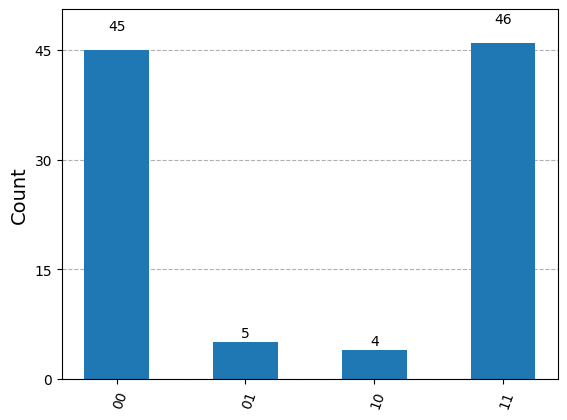

In [41]:
# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

## Ejercicios

### Ejercicio

Crear la puerta $C^{3}X$ haciendo uso de **Numpy** para calcular **V** y siguiendo el esquema siguiente:

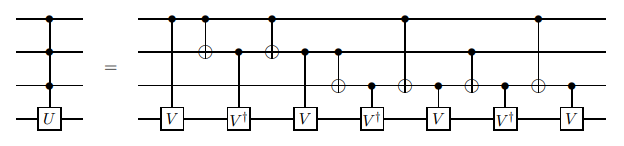

Con $U=X$ $V=\sqrt[4]{U}$ y: 

$\sqrt[n]{X} = \frac{1}{2} \begin{pmatrix}
 1 + e^{\frac{i\pi}{n}} & 1 - e^{\frac{i\pi}{n}} \\
 1 - e^{\frac{i\pi}{n}} & 1 + e^{\frac{i\pi}{n}}
\end{pmatrix}
$

Ayuda: $e^x$ en numpy es numpy.exp(x).

<a href="https://arxiv.org/pdf/quant-ph/9503016.pdf"> http://arxiv.org/abs/quant-ph/9503016v1 </a>

Lo que se hace en el siguiente bloque de codigo es sacar $V$ y $V^{\dagger}$. Para esto vamos a sacar la $\sqrt[4]{U}$ que es la dada por la formula que tenemos mas arriba. Despues usamos funciones de numpy para sacar la conjugada traspuesta de $V$ para sacar $V^{\dagger}$. Con estos 2 elementos podemos aplicar las puertas y sacar el circuito descrito mas arriba.

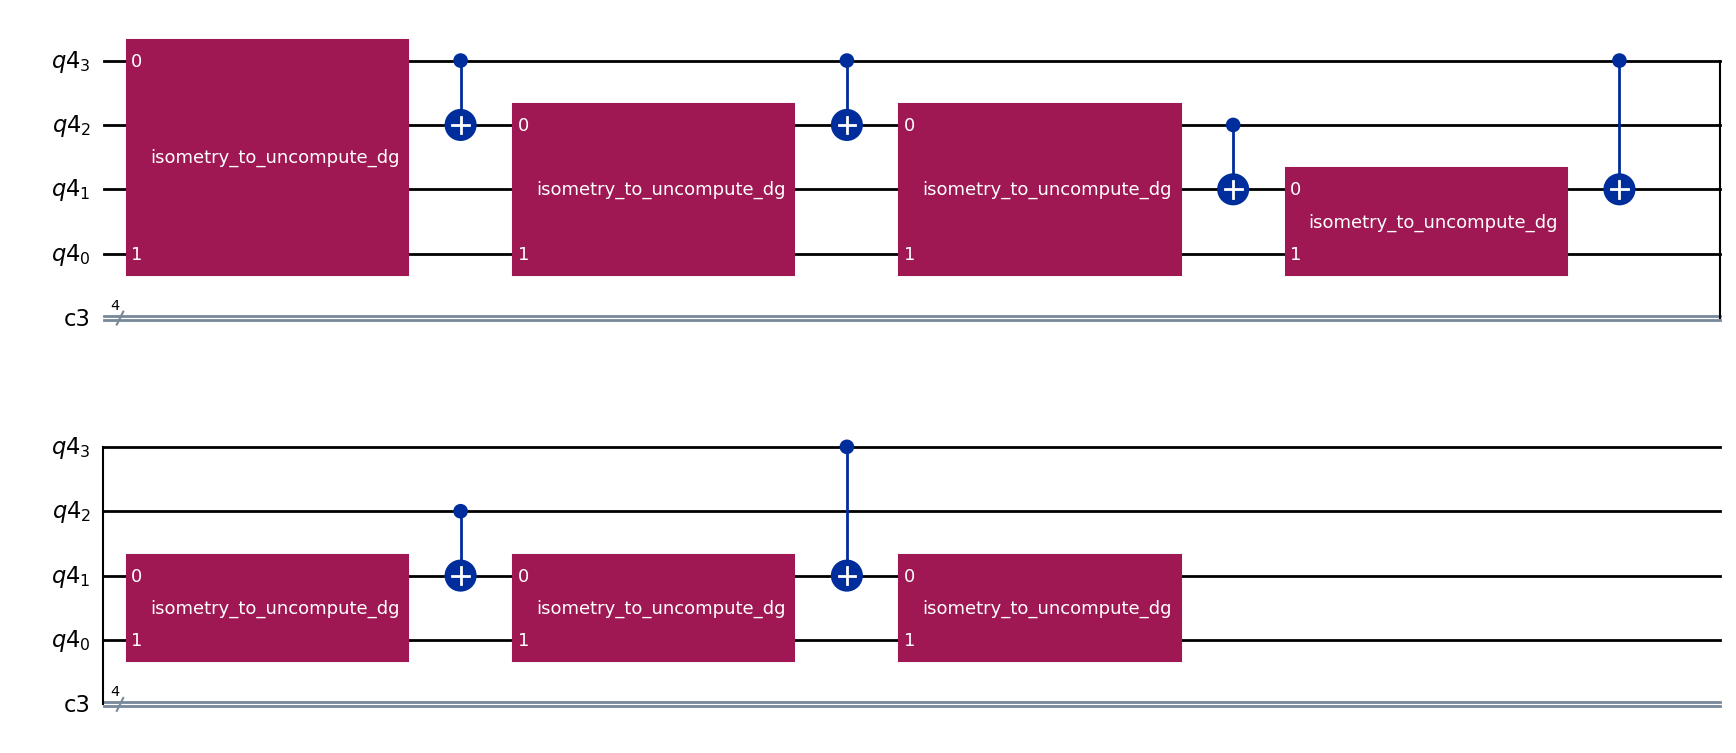

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate
import numpy as np

#Creamos la matriz U que en este caso es la puerta X
U = np.array([[0, 1],
            [1, 0]])

#Creamos las matrices de V y V_dagger dadas por la expresion del enunciado 
exp_term = np.exp(1j * np.pi / 4)
V = (1/2) * np.array([[1 + exp_term, 1 - exp_term],
                    [1 - exp_term, 1 + exp_term]])

V_dagger = np.conj(V).T

#Creamos el registro cuántico de qubits
qreg = QuantumRegister(4)

#Creamos el registro clásico de bits
creg = ClassicalRegister(4)

#Creamos el circuito
circ = QuantumCircuit(qreg, creg, name='Tofolli con 3 controles')

#Creamos las puertas V_gate  y V_dagger_gate
V_gate = UnitaryGate(V)
V_dagger_gate = UnitaryGate(V_dagger)

#Añadimos las diferentes puertas multicontroladas
circ.append(V_gate.control(1), [qreg[3], qreg[0]])
circ.cx(qreg[3], qreg[2])
circ.append(V_dagger_gate.control(1), [qreg[2], qreg[0]])
circ.cx(qreg[3], qreg[2])
circ.append(V_gate.control(1), [qreg[2], qreg[0]])
circ.cx(qreg[2], qreg[1])
circ.append(V_dagger_gate.control(1), [qreg[1], qreg[0]])
circ.cx(qreg[3], qreg[1])
circ.append(V_gate.control(1), [qreg[1], qreg[0]])
circ.cx(qreg[2], qreg[1])
circ.append(V_dagger_gate.control(1), [qreg[1], qreg[0]])
circ.cx(qreg[3], qreg[1])
circ.append(V_gate.control(1), [qreg[1], qreg[0]])

#Mostramos el circuito
display(circ.draw(output='mpl', reverse_bits=True))
